<span style="font-size:28px; color:Purple;"> **Appendix** </span>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', None) # Show all rows
pd.set_option('display.max_columns', None) # Show all columns
pd.options.display.float_format = '{:,.6f}'.format

In [7]:
gics_sectors_dict = {
    "10": "Energy", 
    "15": "Materials",
    "20": "Industrials",
    "25": "Consumer Discretionary",
    "30": "Consumer Staples",
    "35": "Healthcare",
    "40": "Financials",
    "45": "Information Technology",
    "50": "Communication Services",
    "55": "Utilities",
    "60": "Real Estate",
    "na" : "Unclassified"
}

In [8]:
gics_industries_dict = {
    "101010": "Energy Equipment & Services",
    "101020": "Oil, Gas & Consumable Fuels",
    "151010": "Chemicals",
    "151020": "Construction Materials",
    "151030": "Containers & Packaging",
    "151040": "Metals & Mining",
    "151050": "Paper & Forest Products",
    "201010": "Aerospace & Defense",
    "201020": "Building Products",
    "201030": "Construction & Engineering",
    "201040": "Electrical Equipment",
    "201050": "Industrial Conglomerates",
    "201060": "Machinery",
    "201070": "Trading Companies & Distributors",
    "202010": "Commercial Services & Supplies",
    "202020": "Professional Services",
    "203010": "Air Freight & Logistics",
    "203020": "Passenger Airlines",
    "203030": "Marine Transportation",
    "203040": "Ground Transportation",
    "203050": "Transportation Infrastructure",
    "251010": "Automobile Components",
    "251020": "Automobiles",
    "252010": "Household Durables",
    "252020": "Leisure Products",
    "252030": "Textiles, Apparel & Luxury Goods",
    "253010": "Hotels, Restaurants & Leisure",
    "253020": "Diversified Consumer Services",
    "255010": "Distributors",
    "255030": "Broadline Retail",
    "255040": "Specialty Retail",
    "301010": "Consumer Staples Distribution & Retail",
    "302010": "Beverages",
    "302020": "Food Products",
    "302030": "Tobacco",
    "303010": "Household Products",
    "303020": "Personal Care Products",
    "351010": "Health Care Equipment & Supplies",
    "351020": "Health Care Providers & Services",
    "351030": "Health Care Technology",
    "352010": "Biotechnology",
    "352020": "Pharmaceuticals",
    "352030": "Life Sciences Tools & Services",
    "401010": "Banks",
    "402010": "Financial Services",
    "402020": "Consumer Finance",
    "402030": "Capital Markets",
    "402040": "Mortgage Real Estate Investment Trusts (REITs)",
    "403010": "Insurance",
    "451020": "IT Services",
    "451030": "Software",
    "452010": "Communications Equipment",
    "452020": "Technology Hardware, Storage & Peripherals",
    "452030": "Electronic Equipment, Instruments & Components",
    "453010": "Semiconductors & Semiconductor Equipment",
    "501010": "Diversified Telecommunication Services",
    "501020": "Wireless Telecommunication Services",
    "502010": "Media",
    "502020": "Entertainment",
    "502030": "Interactive Media & Services",
    "551010": "Electric Utilities",
    "551020": "Gas Utilities",
    "551030": "Multi-Utilities",
    "551040": "Water Utilities",
    "551050": "Independent Power and Renewable Electricity Producers",
    "601010": "Diversified REITs",
    "601025": "Industrial REITs",
    "601030": "Hotel & Resort REITs",
    "601040": "Office REITs",
    "601050": "Health Care REITs",
    "601060": "Residential REITs",
    "601070": "Retail REITs",
    "601080": "Specialized REITs",
    "602010": "Real Estate Management & Development",
    "na" : "Unclassified"
}

In [9]:
# Read the required CSV files and perform necessary preprocessing

universe = pd.read_csv('../Data/data_us/univ_h.csv')
universe.set_index('year', inplace=True)

columns = ['Ticker', 'GICS_Code']
tickers = pd.read_csv('../Data/data_us/tickers.csv', header=None, names = columns, dtype=str)
tickers.set_index('Ticker', inplace=True)

market_cap = pd.read_csv('../Data/data_us/mktcap.csv')
market_cap['Date'] = pd.to_datetime(market_cap['Date'], format = '%Y%m%d')
market_cap.set_index('Date', inplace=True)
market_cap.replace(np.nan, 0, inplace=True)

adjusted = pd.read_csv('../Data/data_us/adjusted.csv')
adjusted['Date'] = pd.to_datetime(adjusted['Date'], format = '%Y%m%d')
adjusted.set_index('Date', inplace=True)

In [10]:
universe.head()

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,0948669D,0961514D,0964591D,1028411Q,1086832D,1255173D,1255459D,1280712D,1281683D,1284849D,1288453D,1288652D,1293405D,1312089D,1317355D,1431816D,1436513D,1448062D,1500785D,1518855D,1519128D,1520415D,1524867D,1528159D,1539941D,1541931D,1566019D,1649858D,1654539D,1683351D,1683997D,1684442D,1697067D,1704453D,1715651D,1719868D,1746513D,1752754D,1799685D,1806854D,1810430D,1812212D,1822785D,1825471D,1831877D,1837572D,1856613D,1858968D,1920486D,1922150D,1927294D,1972693D,1996074D,1996760D,2071296D,2073714D,2078185D,2207158D,2213185D,2217347D,2258717D,2307532Q,2326007D,2326248D,2370058D,2499073D,2502261D,2641504Q,2676187Q,2942331Q,2968900Q,2987536Q,2999130Q,3022239Q,3026360Q,3029830Q,3080867Q,3133754Q,3153670Q,3286728Q,3362726Q,3393199Q,3403545Q,3414924Q,3423152Q,3517233Q,355488Q,3605818Q,3621240Q,3692470Q,4621824Q,502466Q,519239Q,5656565D,605018Q,605555Q,653707Q,723588Q,764144Q,8206908Q,8277831Q,8394653Q,929530Q,945852Q,987200Q,9876544D,9876549D,9876566D,9903115D,9980328D,9983490D,9990213D,9990253D,9991429D,9995522D,A,AA,AAL,AAP,AAPL,ABBV,ABKFQ,ABMD,ABNB,ABT,ACAS,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,AKS,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCC,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANDV,ANDW,ANET,ANF,ANRZQ,ANSS,AON,AOS,APA,APC,APD,APH,APOL,APTV,ARE,ARG,ASH,ATGE,ATI,ATO,ATVI,AVB,AVGO,AVP,AVY,AW,AWE,AWK,AXON,AXP,AYE,AYI,AZO,BA,BAC,BALL,BAX,BBBYQ,BBWI,BBY,BC,BCR,BDK,BDX,BEN,BF/B,BFH,BG,BHF,BHI,BIGGQ,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BLS,BMC,BMS,BMY,BNI,BOL,BR,BRCM,BRK/B,BRL,BRO,BSX,BTUUQ,BWA,BX,BXLT,BXP,C,CAG,CAH,CAM,CAR,CARR,CAT,CB,CBE,CBOE,CBRE,CCEP,CCI,CCL,CCTYQ,CDAY,CDNS,CDW,CE,CEG,CELG,CEPH,CERN,CF,CFC,CFG,CFN,CHD,CHKAQ,CHRW,CHTR,CI,CIEN,CIN,CINF,CITGQ,CL,CLF,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CMVT,CMX,CNC,CNP,CNX,COF,COL,COO,COP,COR,COST,COTY,COV,CPAY,CPB,CPGX,CPNLQ,CPPRQ,CPRI,CPRT,CPT,CRL,CRM,CSC,CSCO,CSGP,CSRA,CSX,CTAS,CTB,CTLT,CTRA,CTSH,CTVA,CTXS,CVC,CVG,CVH,CVS,CVX,CXO,CZR,D,DAL,DALRQ,DAY,DCNAQ,DD,DDS,DE,DFODQ,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DJ,DLR,DLTR,DLX,DNRCQ,DOC,DOFSQ,DOV,DOW,DPHIQ,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,DYNIQ,EA,EBAY,ECL,ED,EFX,EG,EIX,EKDKQ,EL,ELV,EMN,EMR,ENDPQ,ENPH,EOG,EOP,EPAM,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,ETSY,EVHC,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FBF,FBIN,FCX,FDO,FDS,FDX,FE,FFIV,FHI,FHN,FI,FICO,FIS,FITB,FL,FLIR,FLR,FLS,FLT,FMC,FMCC,FNMA,FOSL,FOX,FOXA,FRCB,FRT,FSH,FSL/B,FSLR,FTI,FTNT,FTRCQ,FTV,GAP,GAS,GD,GDT,GDW,GE,GEHC,GEN,GENZ,GGP,GHC,GILD,GIS,GL,GLW,GM,GMCR,GME,GNRC,GNW,GOOG,GOOGL,GPC,GPN,GR,GRMN,GS,GT,GTW,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCBK,HD,HES,HET,HFC,HIG,HII,HLT,HNZ,HOG,HOLX,HON,HOT,HP,HPC,HPE,HPQ,HRB,HRL,HSH,HSIC,HSP,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITT,ITW,IVZ,J,JBHT,JBL,JCI,JEF,JHF,JKHY,JNJ,JNPR,JNS,JNY,JOY,JPM,JWN,K,KATE,KBH,KDP,KEY,KEYS,KG,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KRB,KRFT,KRI,KSE,KSS,KSU,KVUE,L,LDOS,LEG,LEHMQ,LEN,LH,LHX,LIN,LKQ,LLTC,LLY,LM,LMT,LNC,LNT,LO,LOW,LPX,LRCX,LULU,LUMN,LUV,LVLT,LVS,LW,LXK,LYB,LYV,M,MA,MAA,MAC,MAR,MAS,MAT,MBI,MCD,MCHP,MCK,MCO,MDLZ,MDP,MDT,MEE,MEL,MER,MET,META,MFE,MGM,MHK,MHS,MJN,MKC,MKTX,MLM,MMC,MMM,MNKKQ,MNST,MO,MOH,MOLX,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MTG,MTLQQ,MTW,MU,MUR,MWV,MWW,MXIM,MYL,NAV,NAVI,NBL,NBR,NCC,NCLH,NDAQ,NDSN,NEBLQ,NEE,NEM,NFB,NFLX,NFX,NI,NKE,NKTR,NLSN,NOC,NOV,NOVL,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,NXTL,NYT,O,ODFL,OGN,OI,OKE,OMC,OMX,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PBCT,PBG,PBI,PCAR,PCG,PCL,PCP,PDCO,PEAK,PEG,PENN,PEP,PETM,PFE,PFG,PG,PGL,PGR,PH,PHM,PKG,PLD,PM,PMCS,PNC,PNR,PNW,PODD,POM,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PTC,PTV,PVH,PVN,PWR,PXD,PYPL,QCOM,QEP,QLGC,QRVO,R,RAI,RBK,RCL,RDC,REG,REGN,RF,RHI,RHT,RIG,RJF,RL,RMD,ROH,ROK,ROL,ROP,ROST,RRC,RRD,RSG,RSHCQ,RTN,RTX,RVTY,RX,SANM,SBAC,SBNY,SBUX,SCG,SCHW,SEBL,SEDG,SEE,SGP,SHLDQ,SHW,SIAL,SIG,SITC,SIVBQ,SJM,SLB,SLG,SLM,SNA,SNDK,SNI,SNPS,SNV,SO,SOV,SPG,SPGI,SP

In [11]:
tickers.head(5)

,GICS_Code
Ticker,
0111145D,NaN
0202445Q,NaN
0203524D,NaN
0226226D,NaN
0544749D,NaN


In [12]:
market_cap.head()

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,0948669D,0961514D,0964591D,1028411Q,1086832D,1255173D,1255459D,1280712D,1281683D,1284849D,1288453D,1288652D,1293405D,1312089D,1317355D,1431816D,1436513D,1448062D,1500785D,1518855D,1519128D,1520415D,1524867D,1528159D,1539941D,1541931D,1566019D,1649858D,1654539D,1683351D,1683997D,1684442D,1697067D,1704453D,1715651D,1719868D,1746513D,1752754D,1799685D,1806854D,1810430D,1812212D,1822785D,1825471D,1831877D,1837572D,1856613D,1858968D,1920486D,1922150D,1927294D,1972693D,1996074D,1996760D,2071296D,2073714D,2078185D,2207158D,2213185D,2217347D,2258717D,2307532Q,2326007D,2326248D,2370058D,2499073D,2502261D,2641504Q,2676187Q,2942331Q,2968900Q,2987536Q,2999130Q,3022239Q,3026360Q,3029830Q,3080867Q,3133754Q,3153670Q,3286728Q,3362726Q,3393199Q,3403545Q,3414924Q,3423152Q,3517233Q,355488Q,3605818Q,3621240Q,3692470Q,4621824Q,502466Q,519239Q,5656565D,605018Q,605555Q,653707Q,723588Q,764144Q,8206908Q,8277831Q,8394653Q,929530Q,945852Q,987200Q,9876544D,9876549D,9876566D,9903115D,9980328D,9983490D,9990213D,9990253D,9991429D,9995522D,A,AA,AAL,AAP,AAPL,ABBV,ABKFQ,ABMD,ABNB,ABT,ACAS,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,AKS,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCC,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANDV,ANDW,ANET,ANF,ANRZQ,ANSS,AON,AOS,APA,APC,APD,APH,APOL,APTV,ARE,ARG,ASH,ATGE,ATI,ATO,ATVI,AVB,AVGO,AVP,AVY,AW,AWE,AWK,AXON,AXP,AYE,AYI,AZO,BA,BAC,BALL,BAX,BBBYQ,BBWI,BBY,BC,BCR,BDK,BDX,BEN,BF/B,BFH,BG,BHF,BHI,BIGGQ,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BLS,BMC,BMS,BMY,BNI,BOL,BR,BRCM,BRK/B,BRL,BRO,BSX,BTUUQ,BWA,BX,BXLT,BXP,C,CAG,CAH,CAM,CAR,CARR,CAT,CB,CBE,CBOE,CBRE,CCEP,CCI,CCL,CCTYQ,CDAY,CDNS,CDW,CE,CEG,CELG,CEPH,CERN,CF,CFC,CFG,CFN,CHD,CHKAQ,CHRW,CHTR,CI,CIEN,CIN,CINF,CITGQ,CL,CLF,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CMVT,CMX,CNC,CNP,CNX,COF,COL,COO,COP,COR,COST,COTY,COV,CPAY,CPB,CPGX,CPNLQ,CPPRQ,CPRI,CPRT,CPT,CRL,CRM,CSC,CSCO,CSGP,CSRA,CSX,CTAS,CTB,CTLT,CTRA,CTSH,CTVA,CTXS,CVC,CVG,CVH,CVS,CVX,CXO,CZR,D,DAL,DALRQ,DAY,DCNAQ,DD,DDS,DE,DFODQ,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DJ,DLR,DLTR,DLX,DNRCQ,DOC,DOFSQ,DOV,DOW,DPHIQ,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,DYNIQ,EA,EBAY,ECL,ED,EFX,EG,EIX,EKDKQ,EL,ELV,EMN,EMR,ENDPQ,ENPH,EOG,EOP,EPAM,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,ETSY,EVHC,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FBF,FBIN,FCX,FDO,FDS,FDX,FE,FFIV,FHI,FHN,FI,FICO,FIS,FITB,FL,FLIR,FLR,FLS,FLT,FMC,FMCC,FNMA,FOSL,FOX,FOXA,FRCB,FRT,FSH,FSL/B,FSLR,FTI,FTNT,FTRCQ,FTV,GAP,GAS,GD,GDT,GDW,GE,GEHC,GEN,GENZ,GGP,GHC,GILD,GIS,GL,GLW,GM,GMCR,GME,GNRC,GNW,GOOG,GOOGL,GPC,GPN,GR,GRMN,GS,GT,GTW,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCBK,HD,HES,HET,HFC,HIG,HII,HLT,HNZ,HOG,HOLX,HON,HOT,HP,HPC,HPE,HPQ,HRB,HRL,HSH,HSIC,HSP,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITT,ITW,IVZ,J,JBHT,JBL,JCI,JEF,JHF,JKHY,JNJ,JNPR,JNS,JNY,JOY,JPM,JWN,K,KATE,KBH,KDP,KEY,KEYS,KG,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KRB,KRFT,KRI,KSE,KSS,KSU,KVUE,L,LDOS,LEG,LEHMQ,LEN,LH,LHX,LIN,LKQ,LLTC,LLY,LM,LMT,LNC,LNT,LO,LOW,LPX,LRCX,LULU,LUMN,LUV,LVLT,LVS,LW,LXK,LYB,LYV,M,MA,MAA,MAC,MAR,MAS,MAT,MBI,MCD,MCHP,MCK,MCO,MDLZ,MDP,MDT,MEE,MEL,MER,MET,META,MFE,MGM,MHK,MHS,MJN,MKC,MKTX,MLM,MMC,MMM,MNKKQ,MNST,MO,MOH,MOLX,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MTG,MTLQQ,MTW,MU,MUR,MWV,MWW,MXIM,MYL,NAV,NAVI,NBL,NBR,NCC,NCLH,NDAQ,NDSN,NEBLQ,NEE,NEM,NFB,NFLX,NFX,NI,NKE,NKTR,NLSN,NOC,NOV,NOVL,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,NXTL,NYT,O,ODFL,OGN,OI,OKE,OMC,OMX,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PBCT,PBG,PBI,PCAR,PCG,PCL,PCP,PDCO,PEAK,PEG,PENN,PEP,PETM,PFE,PFG,PG,PGL,PGR,PH,PHM,PKG,PLD,PM,PMCS,PNC,PNR,PNW,PODD,POM,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PTC,PTV,PVH,PVN,PWR,PXD,PYPL,QCOM,QEP,QLGC,QRVO,R,RAI,RBK,RCL,RDC,REG,REGN,RF,RHI,RHT,RIG,RJF,RL,RMD,ROH,ROK,ROL,ROP,ROST,RRC,RRD,RSG,RSHCQ,RTN,RTX,RVTY,RX,SANM,SBAC,SBNY,SBUX,SCG,SCHW,SEBL,SEDG,SEE,SGP,SHLDQ,SHW,SIAL,SIG,SITC,SIVBQ,SJM,SLB,SLG,SLM,SNA,SNDK,SNI,SNPS,SNV,SO,SOV,SPG,SPGI,SP

<span style='color:Purple'> **Question 1** </span>

In [13]:
# Create DataFrames for GICS sectors and industries from dictionaries and initialize relevant columns

gics_sectors = pd.DataFrame(list(gics_sectors_dict.items()), columns=["Code", "Sector_Name"])
gics_sectors.set_index('Code', inplace=True)
gics_sectors['No. of Stocks 2014'] = 0
gics_sectors['No. of Stocks 2024'] = 0

gics_industries = pd.DataFrame(list(gics_industries_dict.items()), columns=["Code", "Industry_Name"])
gics_industries.set_index('Code', inplace=True)
gics_industries['No. of Stocks 2014'] = 0
gics_industries['No. of Stocks 2024'] = 0

gics_sectors['Market Cap of Stocks 2014'] = 0.0
gics_sectors['Market Cap of Stocks 2024'] = 0.0

gics_industries['Market Cap of Stocks 2014'] = 0.0
gics_industries['Market Cap of Stocks 2024'] = 0.0

In [14]:
# Iterate over the years and tickers to update stock count and market cap for GICS sectors and industries

years = [2014, 2024]
for y in years:
    for ticker in universe.columns:
        if universe.loc[y, ticker] == 1:   # Check if the ticker is part of the universe in the given year
            curr_code = str(tickers.loc[ticker, 'GICS_Code'])
            if curr_code == 'nan':         # Handle missing GICS codes
                sector_code = 'na'
                industry_code = 'na'
            
            else:
                sector_code = curr_code[:2]    # Extract sector code (first 2 digits)
                industry_code = curr_code[:6]  # Extract industry code (first 6 digits)

            # Update stock count for the corresponding sector and industry
            gics_sectors.loc[sector_code, f'No. of Stocks {y}'] += 1
            gics_industries.loc[industry_code, f'No. of Stocks {y}'] += 1

            # Retrieve market cap for the given year and ticker
            date = pd.to_datetime(f"{y}0102", format='%Y%m%d')
            curr_market_cap = market_cap.loc[date, ticker]

            # Update market cap for the corresponding sector and industry
            gics_sectors.loc[sector_code, f'Market Cap of Stocks {y}'] += curr_market_cap
            gics_industries.loc[industry_code, f'Market Cap of Stocks {y}'] += curr_market_cap

In [15]:
gics_sectors

,Sector_Name,No. of Stocks 2014,No. of Stocks 2024,Market Cap of Stocks 2014,Market Cap of Stocks 2024
Code,,,,,
10,Energy,45,23,"1,714,223.140000","1,617,214.102100"
15,Materials,31,28,"592,968.530000","983,547.433200"
20,Industrials,64,78,"1,851,276.045500","3,648,384.261600"
25,Consumer Discretionary,62,53,"1,505,581.206100","4,720,285.124300"
30,Consumer Staples,41,38,"1,787,059.533100","2,856,263.468800"
35,Healthcare,55,64,"2,259,201.379500","5,312,223.662000"
40,Financials,67,72,"2,783,578.085500","5,644,229.939100"
45,Information Technology,50,64,"2,318,796.187700","11,628,815.501800"
50,Communication Services,26,22,"1,595,571.071900","5,669,719.599600"


In [16]:
# Remove industries with zero stocks in both 2014 and 2024
gics_industries.drop(gics_industries[(gics_industries['No. of Stocks 2014'] == 0) & 
                    (gics_industries['No. of Stocks 2024'] == 0)].index, inplace = True)

In [17]:
# Compute total number of stocks across all sectors for 2014 and 2024

total_2014 = gics_sectors['No. of Stocks 2014'].sum()
print('Total number of stocks in 2014:',total_2014)

total_2024 = gics_sectors['No. of Stocks 2024'].sum()
print('Total number of stocks in 2024:',total_2024)

Total number of stocks in 2014: 500
Total number of stocks in 2024: 503


In [18]:
gics_industries

,Industry_Name,No. of Stocks 2014,No. of Stocks 2024,Market Cap of Stocks 2014,Market Cap of Stocks 2024
Code,,,,,
101010,Energy Equipment & Services,13,3,"309,275.319500","140,460.189800"
101020,"Oil, Gas & Consumable Fuels",32,20,"1,404,947.820500","1,476,753.912300"
151010,Chemicals,16,16,"437,059.870300","667,427.461900"
151020,Construction Materials,1,2,"7,627.782200","60,059.659600"
151030,Containers & Packaging,7,6,"57,084.064500","86,186.609900"
151040,Metals & Mining,7,4,"91,196.813000","169,873.701800"
201010,Aerospace & Defense,12,12,"693,070.520300","828,269.355900"
201020,Building Products,4,7,"48,860.804300","202,646.067300"
201030,Construction & Engineering,2,1,"19,637.884000","30,403.768900"


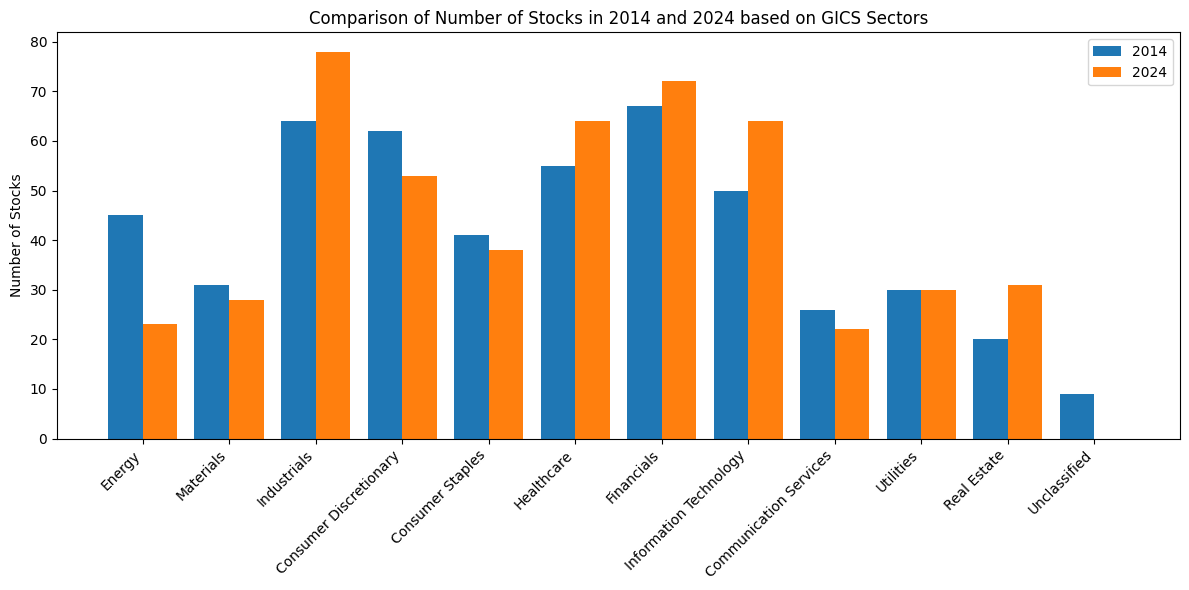

In [19]:
# Plot bar chart for Comparison of Number of Stocks in 2014 and 2024 based on GICS Sectors
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4  
x = range(len(gics_sectors))  

# Plot bars for 2014 and 2024
ax.bar(x, gics_sectors['No. of Stocks 2014'], width=bar_width, label='2014', align='center')
ax.bar([i + bar_width for i in x], gics_sectors['No. of Stocks 2024'], width=bar_width, label='2024', align='center')

# Set labels
ax.set_xticks([i + bar_width / 2 for i in x]) 
ax.set_xticklabels(gics_sectors['Sector_Name'], rotation=45, ha='right')
ax.set_ylabel('Number of Stocks')
ax.set_title('Comparison of Number of Stocks in 2014 and 2024 based on GICS Sectors')
ax.legend()
plt.tight_layout()
plt.show()

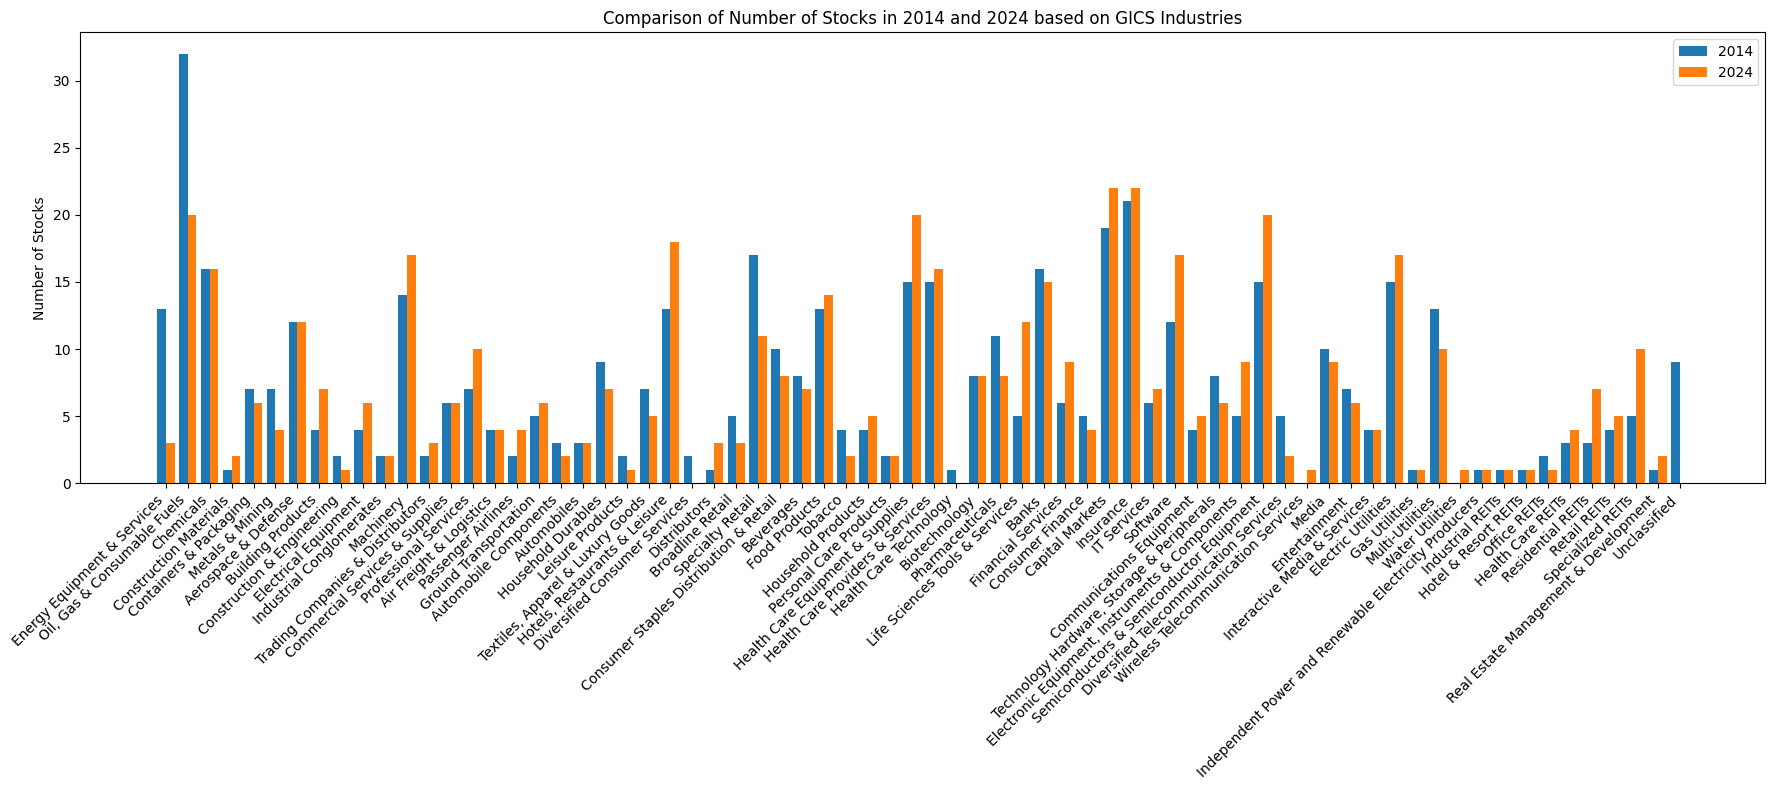

In [20]:
# Plot bar chart for Comparison of Number of Stocks in 2014 and 2024 based on GICS Industries
fig, ax = plt.subplots(figsize=(18, 8))
bar_width = 0.4  
x = range(len(gics_industries))  

# Plot bars for 2014 and 2024
ax.bar(x, gics_industries['No. of Stocks 2014'], width=bar_width, label='2014', align='center')
ax.bar([i + bar_width for i in x], gics_industries['No. of Stocks 2024'], width=bar_width, label='2024', align='center')

# Set labels
ax.set_xticks([i + bar_width / 2 for i in x])  
ax.set_xticklabels(gics_industries['Industry_Name'], rotation=45, ha='right')
ax.set_ylabel('Number of Stocks')
ax.set_title('Comparison of Number of Stocks in 2014 and 2024 based on GICS Industries')
ax.legend()
plt.tight_layout()
plt.show()

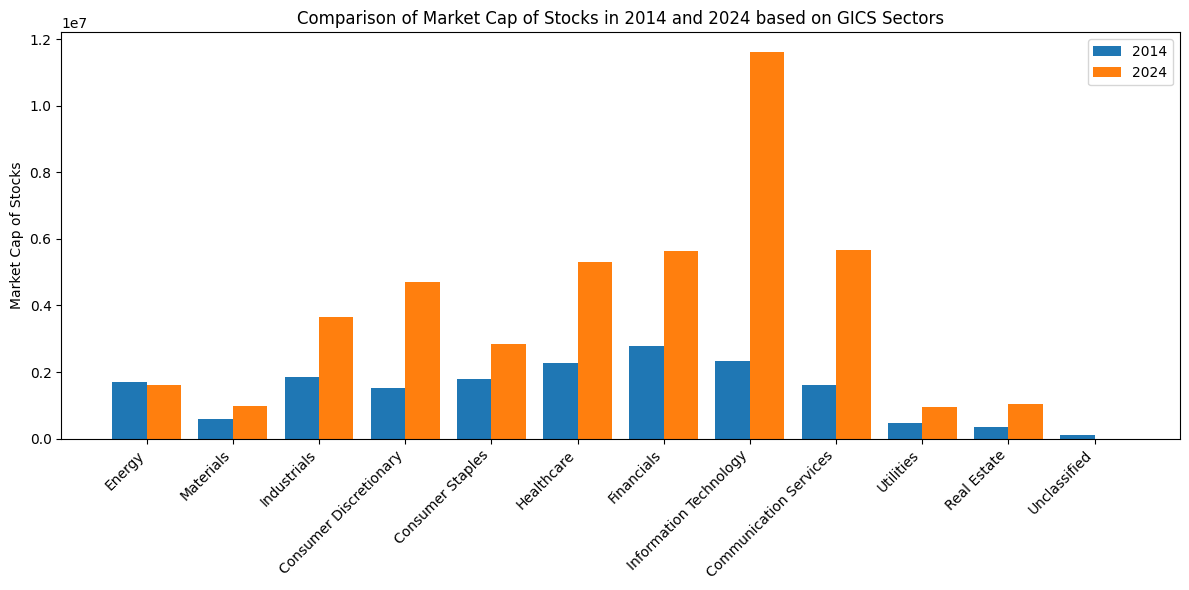

In [21]:
# Plot bar chart for Comparison of Market Cap of Stocks in 2014 and 2024 based on GICS Sectors
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4  
x = range(len(gics_sectors))

# Plot bars for 2014 and 2024
ax.bar(x, gics_sectors['Market Cap of Stocks 2014'], width=bar_width, label='2014', align='center')
ax.bar([i + bar_width for i in x], gics_sectors['Market Cap of Stocks 2024'], width=bar_width, label='2024', align='center')

# Set labels
ax.set_xticks([i + bar_width / 2 for i in x])  
ax.set_xticklabels(gics_sectors['Sector_Name'], rotation=45, ha='right')
ax.set_ylabel('Market Cap of Stocks')
ax.set_title('Comparison of Market Cap of Stocks in 2014 and 2024 based on GICS Sectors')
ax.legend()
plt.tight_layout()
plt.show()

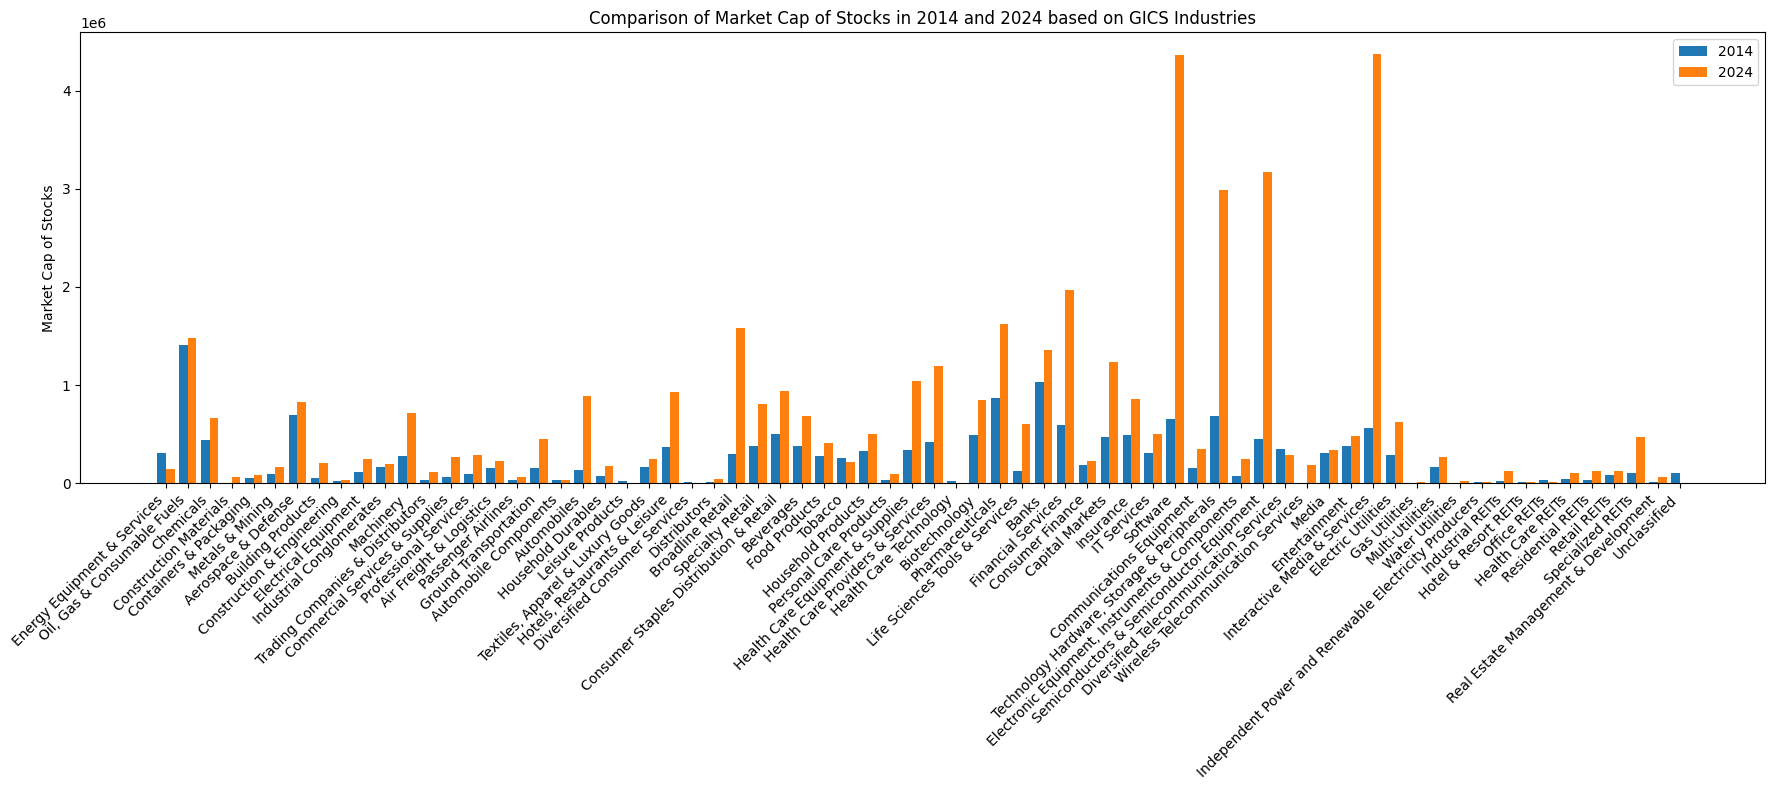

In [22]:
# Plot bar chart for Comparison of Market Cap of Stocks in 2014 and 2024 based on GICS Industries
fig, ax = plt.subplots(figsize=(18, 8))
bar_width = 0.4  
x = range(len(gics_industries))  

# Plot bars for 2014 and 2024
ax.bar(x, gics_industries['Market Cap of Stocks 2014'], width=bar_width, label='2014', align='center')
ax.bar([i + bar_width for i in x], gics_industries['Market Cap of Stocks 2024'], width=bar_width, label='2024', align='center')

# Set labels
ax.set_xticks([i + bar_width / 2 for i in x])  # Center tick labels
ax.set_xticklabels(gics_industries['Industry_Name'], rotation=45, ha='right')
ax.set_ylabel('Market Cap of Stocks')
ax.set_title('Comparison of Market Cap of Stocks in 2014 and 2024 based on GICS Industries')
ax.legend()
plt.tight_layout()
plt.show()

In [23]:
print('Top 3 sectors by Market Cap at the beginning of 2014')
top_3_sectors_2014 = gics_sectors.nlargest(3, 'Market Cap of Stocks 2014')
print(top_3_sectors_2014[['Sector_Name', 'Market Cap of Stocks 2014']])
print()

print('Top 3 sectors by Market Cap at the beginning of 2024')
top_3_sectors_2024 = gics_sectors.nlargest(3, 'Market Cap of Stocks 2024')
print(top_3_sectors_2024[['Sector_Name', 'Market Cap of Stocks 2024']])

Top 3 sectors by Market Cap at the beginning of 2014
                 Sector_Name  Market Cap of Stocks 2014
Code                                                   
40                Financials           2,783,578.085500
45    Information Technology           2,318,796.187700
35                Healthcare           2,259,201.379500

Top 3 sectors by Market Cap at the beginning of 2024
                 Sector_Name  Market Cap of Stocks 2024
Code                                                   
45    Information Technology          11,628,815.501800
50    Communication Services           5,669,719.599600
40                Financials           5,644,229.939100


In [24]:
print('Top 3 industries by Market Cap at the beginning of 2014')
top_3_industries_2014 = gics_industries.nlargest(3, 'Market Cap of Stocks 2014')
print(top_3_industries_2014[['Industry_Name', 'Market Cap of Stocks 2014']])
print()

print('Top 3 industries by Market Cap at the beginning of 2024')
top_3_industries_2024 = gics_industries.nlargest(3, 'Market Cap of Stocks 2024')
print(top_3_industries_2024[['Industry_Name', 'Market Cap of Stocks 2024']])

Top 3 industries by Market Cap at the beginning of 2014
                      Industry_Name  Market Cap of Stocks 2014
Code                                                          
101020  Oil, Gas & Consumable Fuels           1,404,947.820500
401010                        Banks           1,031,024.225700
352020              Pharmaceuticals             863,815.602900

Top 3 industries by Market Cap at the beginning of 2024
                                   Industry_Name  Market Cap of Stocks 2024
Code                                                                       
502030              Interactive Media & Services           4,375,614.834600
451030                                  Software           4,364,983.241300
453010  Semiconductors & Semiconductor Equipment           3,171,491.261400


<span style='color:Purple'> **Question 2** </span>

In [25]:
# Identify the industry code for NVDA and list stocks in the same industry for 2024

nvda_industry_code = tickers.loc['NVDA']['GICS_Code'][:6]
print ('NVDA industry is: Code-' , nvda_industry_code, ' Industry_Name-', gics_industries_dict[nvda_industry_code])
nvda_industry_tickers = []

# Find all stocks in the 2024 universe that belong to the same industry as NVDA
for ticker in universe.columns:
    if universe.loc[2024, ticker] == 1:
        curr_code = str(tickers.loc[ticker, 'GICS_Code'])
        if curr_code != 'nan': 
            industry_code = curr_code[:6]
        
        if nvda_industry_code == industry_code:
            nvda_industry_tickers.append(ticker)
print()
print('Stocks in the 2024 universe that are also in the industry NVDA belongs to:')
print(nvda_industry_tickers)


NVDA industry is: Code- 453010  Industry_Name- Semiconductors & Semiconductor Equipment

Stocks in the 2024 universe that are also in the industry NVDA belongs to:
['ADI', 'AMAT', 'AMD', 'AVGO', 'ENPH', 'FSLR', 'INTC', 'KLAC', 'LRCX', 'MCHP', 'MPWR', 'MU', 'NVDA', 'NXPI', 'ON', 'QCOM', 'QRVO', 'SWKS', 'TER', 'TXN']


<span style='color:Purple'> **Question 3** </span>

In [26]:
# Filter the adjusted close price data to include only stocks in NVDA's industry

adjusted = adjusted[nvda_industry_tickers]
adjusted.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2004-01-02,28.537500,16.169200,14.860000,NaN,NaN,NaN,18.478700,29.946600,2.720100,9.476800,NaN,13.450000,0.176400,NaN,6.350000,17.087400,NaN,7.492400,23.251000,18.769900
2004-01-05,29.416200,17.208200,15.200000,NaN,NaN,NaN,18.909600,31.432300,2.904500,9.626200,NaN,13.851400,0.182100,NaN,6.700000,17.447500,NaN,7.991900,24.258700,19.166900
2004-01-06,30.076800,17.500800,15.610000,NaN,NaN,NaN,18.903900,31.278400,2.889100,9.454200,NaN,14.233200,0.189500,NaN,6.630000,17.281700,NaN,7.700500,24.434300,19.205400
2004-01-07,30.376000,17.442300,15.660000,NaN,NaN,NaN,19.530200,31.082100,2.865000,9.589500,NaN,14.859600,0.191200,NaN,7.010000,17.769300,NaN,7.642200,24.545300,19.179700
2004-01-08,30.918200,17.764200,15.930000,NaN,NaN,NaN,19.673800,31.543700,2.905400,9.767100,NaN,15.143500,0.191900,NaN,7.190000,18.785900,NaN,7.875300,25.691600,20.396500


In [27]:
# Calculate log returns for each ticker in NVDA's industry 
log_returns = adjusted.copy()
for ticker in nvda_industry_tickers:
    log_returns[ticker] = np.log(adjusted[ticker] / adjusted[ticker].shift(1))

# Filter the log returns data between the specified start and end dates
start_date = '2020-01-01'
end_date = '2024-12-31'
log_returns = log_returns.loc[start_date:end_date]
log_returns.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.013291,0.018826,0.068266,0.019958,0.115868,0.022616,0.016406,0.024396,0.018602,0.027131,0.011116,0.029499,0.019391,0.010008,0.027510,0.005200,-0.002326,0.006514,0.021615,0.009928
2020-01-03,-0.017761,-0.016044,-0.010236,-0.025771,-0.001706,-0.003851,-0.012238,-0.019301,-0.010800,-0.022178,-0.018276,-0.015649,-0.016136,-0.009694,-0.014875,-0.019009,-0.031715,-0.025135,-0.021030,-0.013364
2020-01-06,-0.011818,-0.021802,-0.004330,-0.001468,0.012553,-0.021091,-0.002833,-0.022761,-0.018839,-0.014450,-0.010293,-0.017854,0.004194,-0.007095,-0.025432,-0.005878,-0.006251,-0.017772,-0.021930,-0.006986
2020-01-07,0.022496,0.028478,-0.002897,-0.003458,0.011065,0.014934,-0.016826,0.007909,0.024085,0.064942,0.009275,0.084191,0.012025,0.012891,0.024216,0.028039,-0.003679,0.009479,0.021783,0.019114
2020-01-08,0.008991,-0.000650,-0.008743,-0.012569,0.033123,0.000529,0.000679,0.001303,0.012515,-0.012729,-0.001304,-0.012955,0.001873,0.002496,0.006467,-0.002926,0.015079,0.015766,0.001173,0.002701


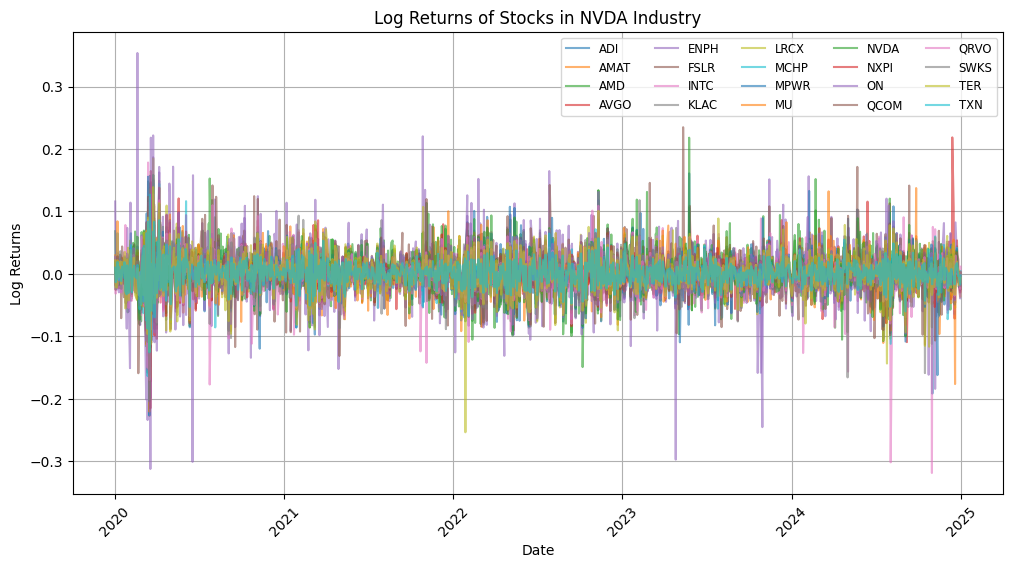

In [28]:
# Plot the log returns of stocks in NVDA's industry over time

plt.figure(figsize=(12, 6))

# Plot each stock's log returns with a label
for ticker in nvda_industry_tickers:
    plt.plot(log_returns.index, log_returns[ticker], label=ticker, alpha=0.6)

# Set labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns of Stocks in NVDA Industry")
plt.legend(loc="upper right", fontsize="small", ncol=5)
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

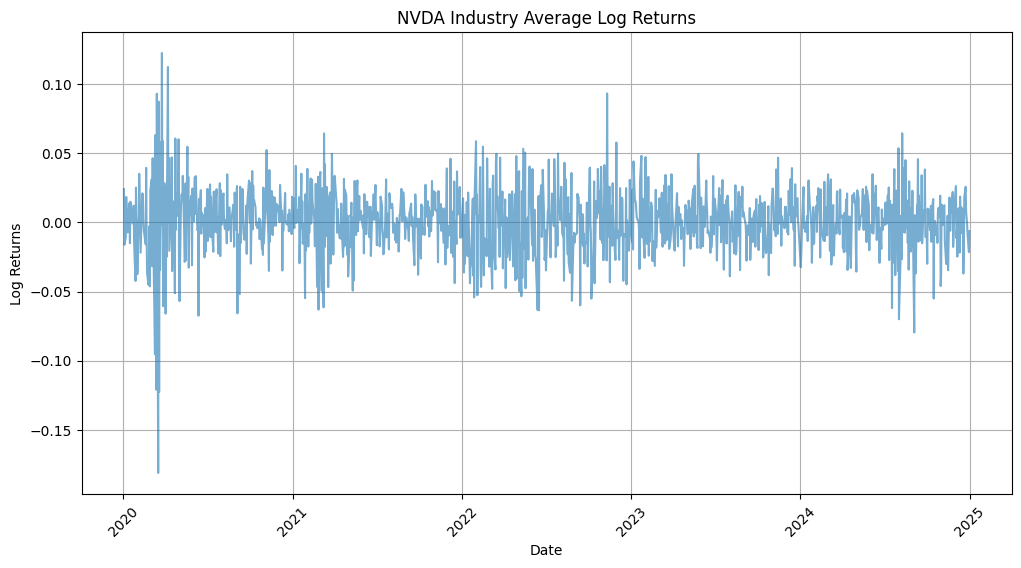

In [29]:
# Calculate the average log return of all stocks in NVDA's industry and plot the result
log_returns['Industry Return'] = log_returns[nvda_industry_tickers].mean(axis=1)

# Plot the average industry log returns over time
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, log_returns['Industry Return'], alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("NVDA Industry Average Log Returns")
plt.xticks(rotation=45)   
plt.grid(True)
plt.show()

In [30]:
# Perform linear regression between NVDA's log returns and the industry average returns
X = sm.add_constant(log_returns['Industry Return'])
y = log_returns['NVDA']

model = sm.OLS(y, X).fit()

# Print the results of the regression
print("Value of Alpha:", model.params['const'])
print("Value of Beta:", model.params['Industry Return'])
print("R-squared of regression:", model.rsquared)

Value of Alpha: 0.0017885515796502275
Value of Beta: 1.111138387645222
R-squared of regression: 0.6261609595596787


<span style='color:Purple'> **Question 4** </span>

In [31]:
# Filter market cap data for the given date range and calculate weighted log returns for NVDA's industry stocks
market_cap_filtered = market_cap.loc[start_date:end_date][nvda_industry_tickers]
weights = market_cap_filtered.div(market_cap_filtered.sum(axis=1), axis=0)

# Multiply log returns by weights to get weighted log returns
log_returns_weighted = log_returns * weights

# Calculate industry return as the weighted average of the stocks' returns
log_returns_weighted['Industry Return'] = log_returns_weighted[nvda_industry_tickers].sum(axis=1)
log_returns_weighted.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,Industry Return,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000497,0.000903,0.003145,0.002156,0.000351,0.000115,0.003658,0.018982,0.000592,0.000677,0.000588,0.000073,0.001529,0.002399,0.000303,0.000239,0.000444,-0.000026,0.000114,0.000213,0.001013
2020-01-03,-0.000663,-0.000770,-0.000474,-0.002758,-0.000005,-0.000020,-0.002739,-0.016101,-0.000467,-0.000395,-0.000478,-0.000120,-0.000812,-0.001996,-0.000295,-0.000129,-0.001617,-0.000354,-0.000435,-0.000206,-0.001367
2020-01-06,-0.000439,-0.001030,-0.000201,-0.000158,0.000039,-0.000107,-0.000637,-0.006757,-0.000542,-0.000681,-0.000309,-0.000067,-0.000916,0.000525,-0.000216,-0.000217,-0.000501,-0.000070,-0.000304,-0.000211,-0.000715
2020-01-07,0.000844,0.001368,-0.000133,-0.000366,0.000035,0.000076,-0.003674,0.012221,0.000188,0.000882,0.001463,0.000061,0.004642,0.001504,0.000393,0.000209,0.002426,-0.000041,0.000162,0.000212,0.001970
2020-01-08,0.000341,-0.000031,-0.000397,-0.001316,0.000107,0.000003,0.000148,-0.000800,0.000031,0.000464,-0.000283,-0.000009,-0.000706,0.000235,0.000076,0.000056,-0.000253,0.000169,0.000274,0.000011,0.000279


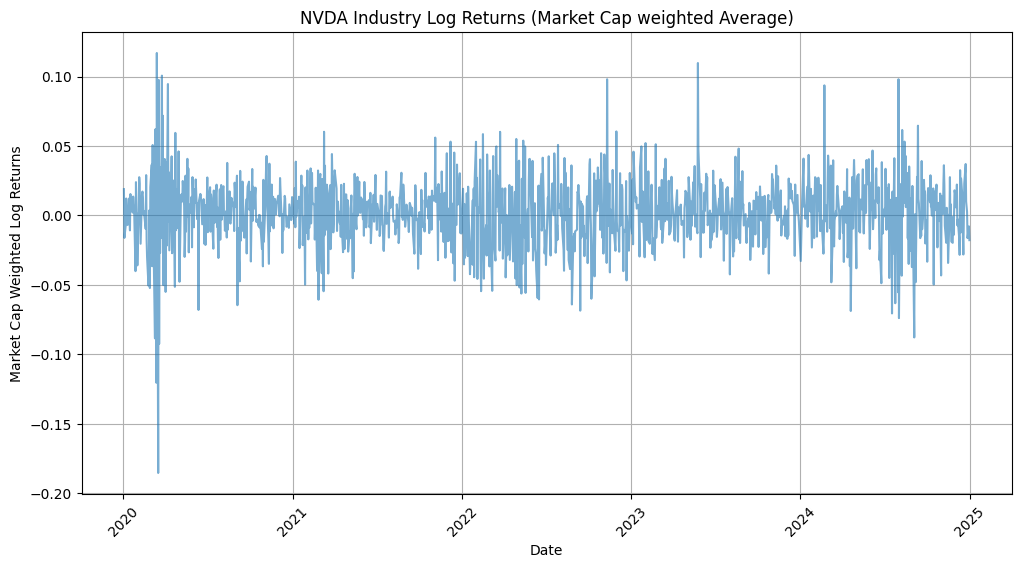

In [32]:
# Plot the market cap weighted average log returns for NVDA's industry 
plt.figure(figsize=(12, 6))
plt.plot(log_returns_weighted.index, log_returns_weighted['Industry Return'], alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Market Cap Weighted Log Returns")
plt.title("NVDA Industry Log Returns (Market Cap weighted Average)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
# Perform linear regression between NVDA's log returns and the market cap weighted industry returns
X = sm.add_constant(log_returns_weighted['Industry Return'])
y = log_returns['NVDA']

model = sm.OLS(y, X).fit()

# Print the results of the regression
print("Value of Alpha:", model.params['const'])
print("Value of Beta:", model.params['Industry Return'])
print("R-squared of regression:", model.rsquared)

Value of Alpha: 0.0007256518555701816
Value of Beta: 1.2380007001265025
R-squared of regression: 0.8458586167329968
